In [1]:
import os
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
from osprey.utils.time import get_decimal_year

In [3]:
from osprey.means.eof import process_data
from osprey.utils import catalogue

In [4]:
varname='thetao'
endleg=21
tmp = "/ec/res4/scratch/itas/martini/TS00/021"

In [5]:
info = catalogue.observables('nemo')[varname]

In [6]:
filename = os.path.join(tmp, f"{varname}_pattern.nc")
pattern = xr.open_mfdataset(filename, use_cftime=True, preprocess=lambda data: process_data(data, ftype='pattern', dim=info['dim'], grid=info['grid']))

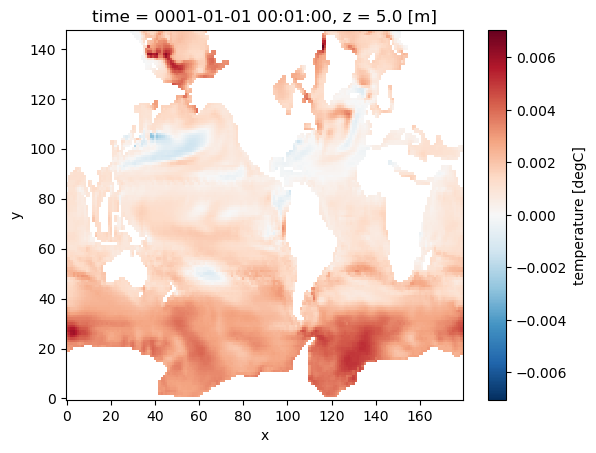

In [7]:
pattern['thetao'].isel(time=0,z=0).plot()

In [27]:
filename = os.path.join(tmp, f"{varname}_series_00000.nc")    
timeseries = xr.open_mfdataset(filename, use_cftime=True, preprocess=lambda data: process_data(data, ftype='series', dim=info['dim'], grid=info['grid']))  

In [44]:
new_time = get_decimal_year(timeseries['time'].values)
timeseries['time'] = new_time

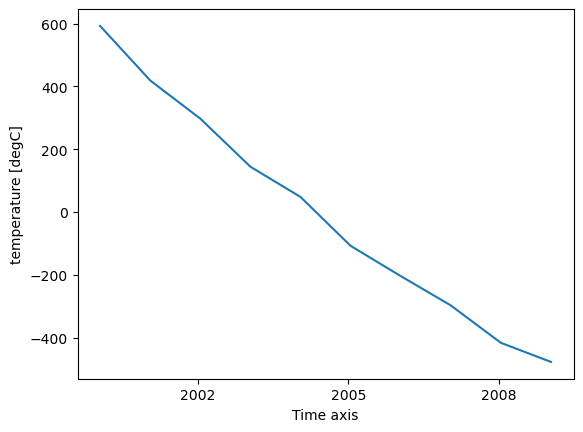

In [28]:
timeseries['thetao'].plot()

In [45]:
timeseries['time'].values

array([2000.04234973, 2001.04246575, 2002.04246575, 2003.04246575,
       2004.04234973, 2005.04246575, 2006.04246575, 2007.04246575,
       2008.04234973, 2009.04246575])

In [66]:
# Apply polyfit
# from gnuplot:
# Final set of parameters            Asymptotic Standard Error
# =======================            ==========================
# a               = -119.06          +/- 4.066        (3.415%)
# b               = 238660           +/- 8150         (3.415%)
#
p = timeseries.polyfit(dim='time', deg=1)
m, q = p[f"{varname}_polyfit_coefficients"].values
print(f"m={m}, q={q}")

m=-119.05976956553387, q=238660.359914224


In [67]:
p['thetao_polyfit_coefficients'].values

array([-1.1905977e+02,  2.3866036e+05])

In [73]:
import numpy as np
import cftime

def _forecast_xarray(foreyear, use_cftime=True):
    """Get the xarray for the forecast time"""

    fdate = cftime.DatetimeGregorian(foreyear, 1, 16, 12, 0, 0, has_year_zero=False)
    if use_cftime == False:
        fdate = get_decimal_year([fdate])[0]
    
    xf = xr.DataArray(data = np.array([fdate]), dims = ['time'], coords = {'time': np.array([fdate])},
                      attrs = {'stardand_name': 'time', 'long_name': 'Time axis', 'bounds': 'time_counter_bnds', 'axis': 'T'})

    return xf

In [74]:
from osprey.utils.time import get_forecast_year

xf = _forecast_xarray(2008, use_cftime=False)

In [76]:
theta = xr.polyval(xf, p[f"thetao_polyfit_coefficients"])

In [78]:
theta.values

array([-416.69952208])

In [79]:
m,q

(np.float64(-119.05976956553387), np.float64(238660.359914224))

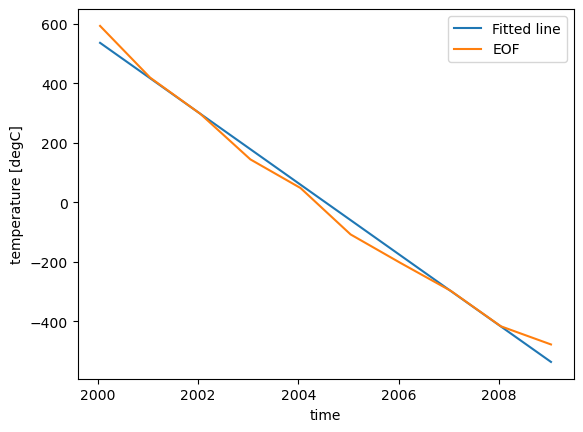

In [81]:
m, q = p[f"{varname}_polyfit_coefficients"].values
x = timeseries['time'].values
y = m * x + q
plt.plot(timeseries['time'].values, y, label='Fitted line')
timeseries['thetao'].plot(label='EOF')
plt.legend()

In [55]:
theta = xr.polyval(xf, p[f"{varname}_polyfit_coefficients"])

In [56]:
theta.values

array([-3993.17232584])

TypeError: No numeric data to plot.

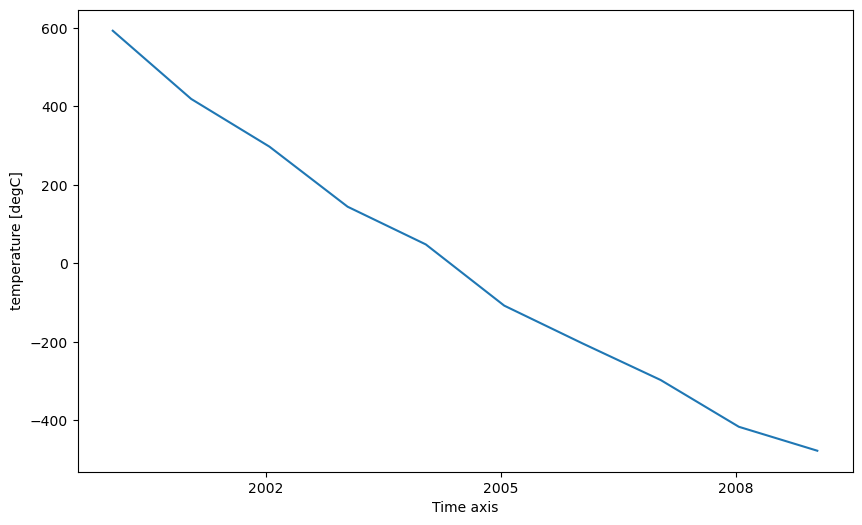

In [28]:
plt.figure(figsize=(10, 6))
timeseries['thetao'].plot(label='Timeseries')
theta.plot(label='Polyfit', linestyle='--', marker='o')
plt.legend()
plt.title('Timeseries with Polyfit Curve')
plt.xlabel('Time')
plt.ylabel('Thetao')
plt.show()